In [30]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [2]:
df = pd.read_csv("BTCUSDT-15m/BTCUSDT-15m.csv")

In [3]:
df.shape

(104802, 152)

In [4]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,TSF,VAR
0,2020-01-01 05:45:00+05:30,7176.22,7179.41,7170.69,7172.36,707.833,2020-01-01 05:59:59.999000+05:30,5.078345e+06,1199,274.610,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 06:00:00+05:30,7172.79,7179.45,7170.61,7174.83,325.246,2020-01-01 06:14:59.999000+05:30,2.333752e+06,447,162.536,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 06:15:00+05:30,7174.51,7179.36,7170.15,7171.55,378.633,2020-01-01 06:29:59.999000+05:30,2.716368e+06,482,175.301,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 06:30:00+05:30,7171.43,7188.77,7171.10,7186.60,555.389,2020-01-01 06:44:59.999000+05:30,3.987949e+06,807,336.827,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 06:45:00+05:30,7186.60,7210.00,7184.16,7205.90,1332.077,2020-01-01 06:59:59.999000+05:30,9.589472e+06,2264,857.992,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.120696


In [5]:
df.describe()

,open,high,low,close,volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,entry,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,TSF,VAR
count,104802.000000,104802.000000,104802.000000,104802.000000,104802.000000,1.048020e+05,104802.000000,104802.000000,1.048020e+05,104801.000000,...,104802.0,104802.000000,104797.000000,104773.000000,104789.000000,104789.000000,104789.000000,104789.000000,104789.000000,1.047980e+05
mean,28885.905580,28966.486745,28803.549218,28885.971945,4032.448185,1.160570e+08,29782.540419,2011.941676,5.777993e+07,28886.089772,...,0.0,-0.013359,0.532177,0.870206,28888.662474,1.848939,28887.504745,0.089056,28888.751530,1.529111e+04
std,17142.024355,17193.373688,17089.540062,17141.919702,4902.308161,1.483213e+08,34029.873526,2457.443942,7.404864e+07,17141.959047,...,0.0,8.031377,0.755191,0.124854,17141.946127,78.139583,17143.095220,39.389666,17142.491305,7.262640e+04
min,3757.750000,4155.210000,3621.810000,3761.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,3761.100000,...,0.0,-100.000000,-20.929521,-0.755325,3973.280857,-89.901235,4224.830286,-580.119055,3861.999011,3.508248e-01
25%,11607.307500,11623.750000,11588.000000,11607.502500,1483.346750,2.803243e+07,9409.000000,726.785500,1.382130e+07,11607.490000,...,0.0,0.000000,0.156918,0.839082,11609.694857,-84.014815,11603.994286,-9.538088,11610.182637,2.945936e+02
50%,23565.850000,23638.195000,23486.235000,23565.670000,2558.051000,7.329688e+07,20628.000000,1271.849500,3.608828e+07,23565.700000,...,0.0,0.000000,0.481318,0.905581,23555.367714,13.743134,23565.559429,0.244571,23561.605495,2.103155e+03
75%,43032.587500,43149.882500,42908.282500,43032.577500,4676.056000,1.455385e+08,37187.000000,2342.205000,7.257448e+07,43032.990000,...,0.0,0.000000,0.850195,0.946599,43027.567143,84.391258,43032.587714,10.182791,43016.408681,1.011448e+04
max,68806.620000,69198.700000,68541.250000,68805.500000,128323.789000,3.789528e+09,970423.000000,61814.789000,2.019928e+09,68805.500000,...,0.0,100.000000,35.811427,0.999205,68963.358857,89.877941,69019.446571,469.409429,69133.973187,6.054109e+06


In [6]:
df.select_dtypes(include="object")

,open_time,close_time
0,2020-01-01 05:45:00+05:30,2020-01-01 05:59:59.999000+05:30
1,2020-01-01 06:00:00+05:30,2020-01-01 06:14:59.999000+05:30
2,2020-01-01 06:15:00+05:30,2020-01-01 06:29:59.999000+05:30
3,2020-01-01 06:30:00+05:30,2020-01-01 06:44:59.999000+05:30
4,2020-01-01 06:45:00+05:30,2020-01-01 06:59:59.999000+05:30
...,...,...
104797,2023-01-01 04:15:00+05:30,2023-01-01 04:29:59.999000+05:30
104798,2023-01-01 04:30:00+05:30,2023-01-01 04:44:59.999000+05:30
104799,2023-01-01 04:45:00+05:30,2023-01-01 04:59:59.999000+05:30
104800,2023-01-01 05:00:00+05:30,2023-01-01 05:14:59.999000+05:30


In [7]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [8]:
column_names = df.columns


missing_df = pd.DataFrame({
    "name" : column_names,
    "missing": df.isnull().mean().tolist()
}, columns=["name", "missing"])

missing_df["missing"] = missing_df["missing"] * 100

missing_df.sort_values("missing", ascending=False, inplace=True)


In [9]:
missing_df[:10]

,name,missing
19,entered_before,95.600275
17,longs_win_after,57.568558
16,shorts_win_after,56.755596
25,EMA-200,0.189882
63,TRIX,0.083968
35,TEMA,0.083014
70,HT_DCPHASE,0.060113
26,HT_TRENDLINE,0.060113
23,DEMA,0.055342
24,EMA-50,0.046755


In [10]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [11]:
df.replace(np.nan, -500, inplace=True)

In [12]:
df.if_long.value_counts()

-1    60328
 1    44469
 0        5
Name: if_long, dtype: int64

In [13]:
df["if_long"] = df["if_long"].replace(-1, 0)

In [14]:
df.if_long.value_counts()

0    60333
1    44469
Name: if_long, dtype: int64

In [44]:
df.if_short.value_counts()

-1    59473
 1    45321
 0        8
Name: if_short, dtype: int64

### Long model

In [15]:
long_df = df.drop("if_short", axis=1)

In [16]:
long_y = df["if_long"]

In [17]:
long_x = df.drop("if_long", axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(long_x, long_y, test_size=0.1)

In [19]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [20]:
clf = RandomForestClassifier(max_depth=100, random_state=0)

In [21]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
clf.score(X_test, y_test)

0.9036351493178132

In [24]:
clf.classes_

array([0, 1])

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [26]:
cm

array([[5184,  831],
       [ 179, 4287]])

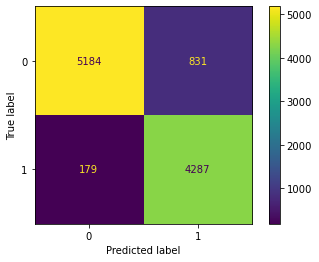

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6015
           1       0.84      0.96      0.89      4466

    accuracy                           0.90     10481
   macro avg       0.90      0.91      0.90     10481
weighted avg       0.91      0.90      0.90     10481



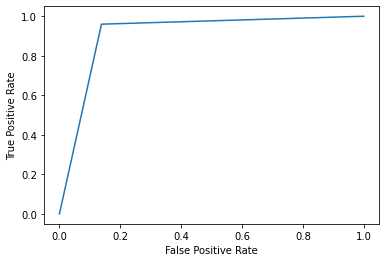

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [31]:
auc(fpr, tpr)

0.9108823887437698

### Short model

In [45]:
short_df = df.drop("if_long", axis=1)

In [46]:
short_y = df["if_short"]

In [47]:
short_y.value_counts()

-1    59473
 1    45321
 0        8
Name: if_short, dtype: int64

In [49]:
short_y = short_y.replace(-1, 0)

In [51]:
short_y.value_counts()

0    59481
1    45321
Name: if_short, dtype: int64

In [50]:
short_x = df.drop("if_short", axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(short_x, short_y, test_size=0.1)

In [53]:
clf = RandomForestClassifier(max_depth=100, random_state=0)

In [54]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [55]:
y_pred = clf.predict(X_test)

In [56]:
clf.score(X_test, y_test)

0.9049708997233088

In [57]:
clf.classes_

array([0, 1])

In [58]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [59]:
cm

array([[5132,  850],
       [ 146, 4353]])

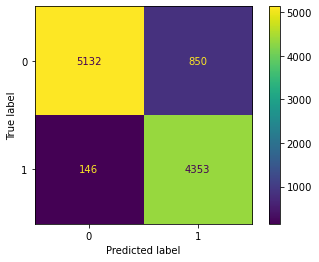

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      5982
           1       0.84      0.97      0.90      4499

    accuracy                           0.90     10481
   macro avg       0.90      0.91      0.90     10481
weighted avg       0.91      0.90      0.91     10481



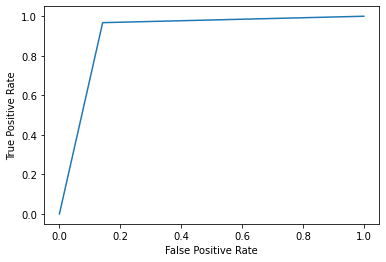

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [63]:
auc(fpr, tpr)

0.9127276992866425